In [62]:
import numpy as np
import pandas as pd
import math
# import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import pyart

import astropy.coordinates as coord
from astropy.time import Time
import astropy.units as u

import pytz


# import boto3
# import botocore
# from botocore.client import Config

# from metpy.io import Level2File
# from metpy.plots import add_timestamp, ctables

import cartopy.crs as ccrs
from datetime import datetime
import time

import netCDF4
import os
#  32.5,  33.5
# -97.5, -96.5

In [5]:
folder = "spatial"
node_id = "10004098"
dir_out = "../figures/" + folder + "/"
dir_data = "../data/"

fn_in = dir_data + "driving_" + node_id + ".csv"
df = pd.read_csv(fn_in, index_col = 'UTC', parse_dates = ['UTC'])

In [6]:
for day in np.unique(df.index.date):
    df1 = df[(df.index.date == day)]
    

In [18]:
filename = '/Volumes/Backup Plus/NEXRAD/data/2020-02-10/2020_02_10_KFWS_KFWS20200210_172020_V06'
radar = pyart.io.read_nexrad_archive(filename)
# radar.fields['reflectivity']['data'][:, -10:] = np.ma.masked


In [8]:
# # PPI plot with an elevation angle, [0.5, 0.5, 0.9, 0.9, 1.3, 1.3, 1.8, 2.4, 3.1, 4.0, 5.1, 6.4]
# display = pyart.graph.RadarDisplay(radar)
# fig = plt.figure(figsize=[8, 7])
# plt.rcParams.update({'font.size': 15})
# ax = fig.add_subplot(111)
# display.plot('reflectivity', sweep=0, vmin=-32, vmax=64.0)

# # display.plot_range_rings([50, 100, 150, 200])
# # display.plot_cross_hair(4)
# display.set_limits(xlim=(-300, 300), ylim=(-300, 300), ax=ax)
# # plt.tight_layout()
# plt.show()

In [9]:
# # PPI map display with an elevation angle
# fig = plt.figure(figsize=[8, 7])
# display = pyart.graph.RadarMapDisplay(radar)
# display.plot_ppi_map('reflectivity', sweep=0, vmin=-32, vmax=64.0, resolution='50m',
#                     projection=ccrs.PlateCarree())


In [10]:
# # Plot a cross section with some Azimuth angle
# xsect = pyart.util.cross_section_ppi(radar, [0])
# display = pyart.graph.RadarDisplay(xsect)

# fig = plt.figure(figsize=[20, 4])
# plt.rcParams.update({'font.size': 15})

# ax = fig.add_subplot(111)
# display.plot('reflectivity', 0, vmin=-32, vmax=64.)
# plt.xlim(0,300)
# plt.ylim(0,15)

# plt.tight_layout()
# plt.show()

In [16]:
grid = pyart.map.grid_from_radars(radar, grid_shape=(11, 50, 50),
                                  grid_limits=((0.,10000,), (-300000., 300000.), (-300000, 300000.)))


/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/pyart/map/gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


In [54]:
filename = '/Volumes/Backup Plus/NEXRAD/data/2020-02-10/2020_02_10_KFWS_KFWS20200210_172020_V06'
radar = pyart.io.read_nexrad_archive(filename)
# radar.fields['reflectivity']['data'][:, -10:] = np.ma.masked
grid_cloudy = pyart.map.grid_from_radars(radar, grid_shape=(11, 50, 50),
                                  grid_limits=((0.,10000,), (-300000., 300000.), (-300000, 300000.)))


/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/pyart/map/gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


In [55]:
filename = '/Volumes/Backup Plus/NEXRAD/data/2020-02-01/2020_02_01_KFWS_KFWS20200201_205038_V06'
radar = pyart.io.read_nexrad_archive(filename)
# radar.fields['reflectivity']['data'][:, -10:] = np.ma.masked

grid_sunny = pyart.map.grid_from_radars(radar, grid_shape=(11, 50, 50),
                                  grid_limits=((0.,10000,), (-300000., 300000.), (-300000, 300000.)))


/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/pyart/map/gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


In [60]:
dir_out

'../figures/spatial/'

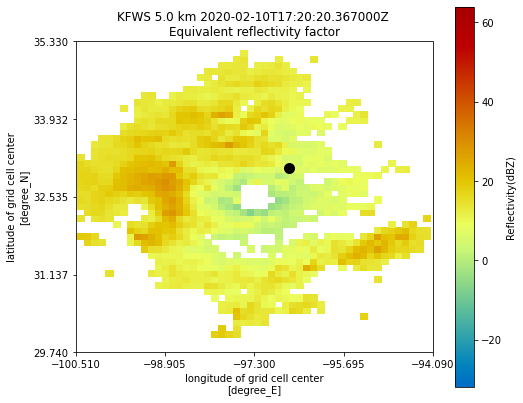

In [64]:
fig = plt.figure(figsize=[8, 7])
display = pyart.graph.GridMapDisplay(grid_cloudy)
display.plot_grid('reflectivity', level=5, vmin=-32, vmax=64)
plt.scatter([-96.67352], [33.048915], s = 100, c = 'black')

if not os.path.exists(dir_out + 'NEXRAD'):
    os.mkdir(dir_out + 'NEXRAD')

fig.savefig(dir_out+ 'NEXRAD' + '/NEXRAD_cloudy_'+'2020_02_10'+'.png')


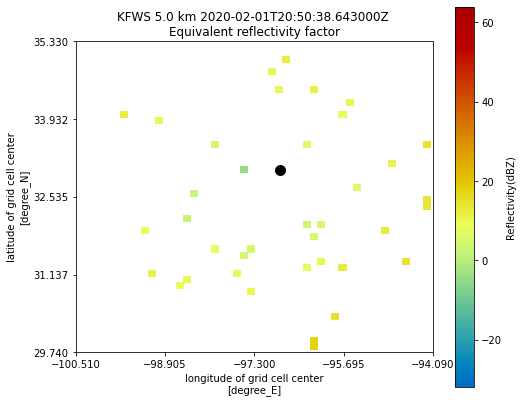

In [65]:

fig = plt.figure(figsize=[8, 7])
display = pyart.graph.GridMapDisplay(grid_sunny)
display.plot_grid('reflectivity', level=5, vmin=-32, vmax=64)
plt.scatter([-96.832813], [33.026093], s = 100, c = 'black')

if not os.path.exists(dir_out + 'NEXRAD'):
    os.mkdir(dir_out + 'NEXRAD')

fig.savefig(dir_out+ 'NEXRAD' + '/NEXRAD_sunny_'+'2020_02_01'+'.png')


In [13]:
# fig = plt.figure(figsize=[20, 2])
# display.plot_latitude_slice('reflectivity', lat=33, vmin=-32, vmax=64)
# # plt.xlim([-20, 20])
# plt.ylim([0, 20]);

In [14]:
# altitude of radar
print('Altitude of radar:', radar.altitude['data'][0])
print('Median altitude of the Driving Car: 207.84 ')

Altitude of radar: 236.0
Median altitude of the Driving Car: 207.84 


In [65]:
z_curr, x_curr, y_curr = 0, 10000, 10000 # median altitude of the driving car is close to the altitude of the radar
delta_z, delta_x, delta_y = 10000, 5000, 5000

time_start = time.time()
grid = pyart.map.grid_from_radars(radar, grid_shape=(11, 5, 5),\
                                  grid_limits=((z_curr,z_curr+delta_z), 
                                               (x_curr - delta_x, x_curr + delta_x), 
                                               (y_curr - delta_y, y_curr + delta_y)
                                              )
                                 )
print(time.time()-time_start)


/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/pyart/map/gates_to_grid.py:163: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990.
  warnings.warn("Barnes weighting function is deprecated."


1.6920371055603027


In [62]:
grid.fields['reflectivity']['data'][0]

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


masked_array(
  data=[[-4.963181495666504, -5.94474983215332, -7.978635311126709],
        [-2.9395956993103027, -3.6726839542388916, -5.836319923400879],
        [-7.1309380531311035, -1.720728874206543, -5.590971946716309]],
  mask=[[False, False, False],
        [False, False, False],
        [False, False, False]],
  fill_value=1e+20,
  dtype=float32)

In [64]:
grid.fields['reflectivity']['data'][0]

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


masked_array(
  data=[[-4.963181495666504, -5.534565448760986, -5.94474983215332,
         -6.307763576507568, -7.978635311126709],
        [-3.706688642501831, -2.0887367725372314, -4.901059150695801,
         -4.413471221923828, -7.639217853546143],
        [-2.9395956993103027, -5.178906440734863, -3.6726839542388916,
         -1.347941279411316, -5.836319923400879],
        [-6.239497661590576, -3.5437355041503906, -4.042289733886719,
         -6.805198669433594, -3.4087674617767334],
        [-7.1309380531311035, -5.43792200088501, -1.720728874206543,
         -6.627655982971191, -5.590971946716309]],
  mask=[[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]],
  fill_value=1e+20,
  dtype=float32)

In [70]:
radar.longitude

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'long_name': 'Longitude',
 'standard_name': 'Longitude',
 'units': 'degrees_east',
 'data': array([-97.30314636])}

In [66]:
pyart.core.geographic_to_cartesian(radar.longitude['data'][0]+0.5,
                                   radar.latitude['data'][0]+0.5,
                                   grid.get_projparams())


/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([46589.73281372]), array([55707.38004436]))

In [408]:
pyart.core.cartesian_to_geographic(0,0)

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: cartesian_to_geographic() missing 1 required positional argument: 'projparams'

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


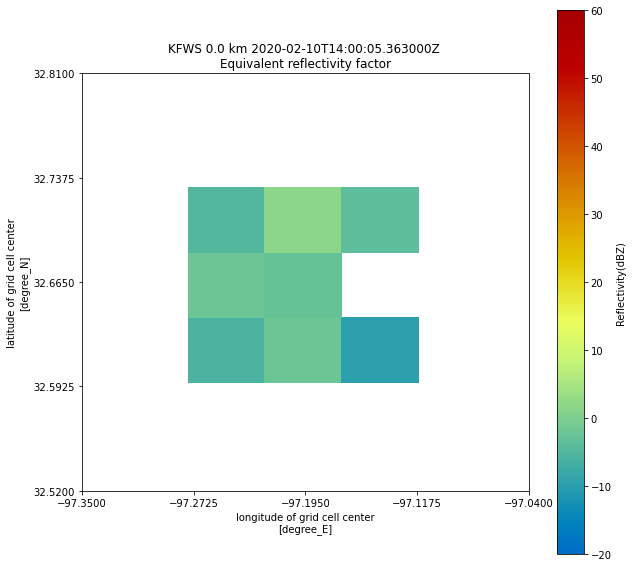

In [407]:
fig = plt.figure(figsize=[10, 10])
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid('reflectivity', level=0, vmin=-20, vmax=60)

In [294]:
(1-radar.fields['velocity']['data'].mask.sum()

/Users/Strawberry/opt/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


207802

In [292]:
radar.fields['velocity']['data'].mask.sum()

/Users/Strawberry/opt/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


11663558

/Users/Strawberry/opt/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


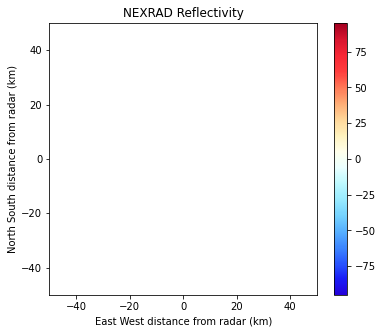

In [278]:
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=(6, 5))

# plot super resolution reflectivity
ax = fig.add_subplot(111)
display.plot('velocity', 0, title='NEXRAD Reflectivity', colorbar_label='', ax=ax)
display.plot_range_ring(radar.range['data'][-1]/1000., ax=ax)
display.set_limits(xlim=(-50, 50), ylim=(-50, 50), ax=ax)
plt.show()

In [240]:
grid.fields[]

/Users/Strawberry/opt/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: invalid syntax (<ipython-input-240-2fb8b79bc6e6>, line 1)

/Users/Strawberry/opt/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


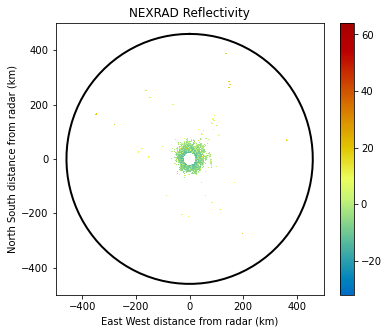

In [6]:
filename = '/Volumes/Backup Plus/NEXRAD/data/2020-01-08/2020_01_08_KFWS_KFWS20200108_191600_V06'
radar = pyart.io.read_nexrad_archive(filename)
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=(6, 5))

# plot super resolution reflectivity
ax = fig.add_subplot(111)
display.plot('reflectivity', 0, title='NEXRAD Reflectivity',
             vmin=-32, vmax=64, colorbar_label='', ax=ax)
display.plot_range_ring(radar.range['data'][-1]/1000., ax=ax)
display.set_limits(xlim=(-500, 500), ylim=(-500, 500), ax=ax)
plt.show()

/Users/Strawberry/opt/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/Strawberry/opt/miniconda3/lib/python3.8/site-packages/pyart/map/gates_to_grid.py:160: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990.
  warnings.warn("Barnes weighting function is deprecated."


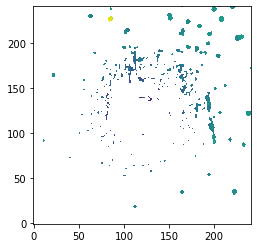

In [125]:
radar = pyart.io.read(filename)

# mask out last 10 gates of each ray, this removes the "ring" around the radar.
radar.fields['reflectivity']['data'][:, -10:] = np.ma.masked

# exclude masked gates from the gridding
gatefilter = pyart.filters.GateFilter(radar)
gatefilter.exclude_transition()
gatefilter.exclude_masked('reflectivity')

# perform Cartesian mapping, limit to the reflectivity field.
grid = pyart.map.grid_from_radars(
    (radar,), gatefilters=(gatefilter, ),
    grid_shape=(1, 241, 241),
    grid_limits=((2000, 2000), (-123000.0, 123000.0), (-123000.0, 123000.0)),
    fields=['reflectivity','velocity'])

# create the plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(grid.fields['reflectivity']['data'][0], origin='lower')
plt.show()

/Users/Strawberry/opt/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


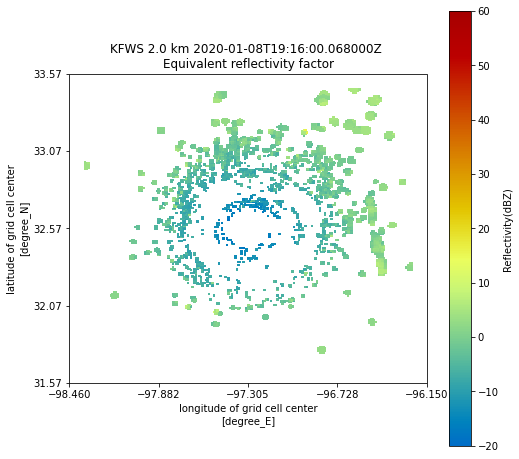

In [126]:
fig = plt.figure(figsize=[8, 8])
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid('reflectivity', level=2, vmin=-20, vmax=60)


In [2]:
R = 6371 * 1000 # radius of earth
def distance(lat1,long1, lat2, long2):
    # dx / R
    dx = math.radians(long1 - long2) * np.cos(math.radians(( lat1 + lat2)/2 ))
    # dy / R
    dy = math.radians(lat1 - lat2)
    # ds = R*sqrt(dx^2 + dy^2)
    h1 = R*np.sqrt(dx*dx + dy*dy)
    return h1

In [3]:
origin_latitude = 32.57861
origin_longitude = -97.303611
R = 6371 * 1000 # radius of earth
def xy2latlong(x, y): # based on origin_latitude, origin_longitude
    dlat_radians = y/R
    lat = origin_latitude + math.degrees(dlat_radians)
    dlon_radians = x/(R*math.cos(origin_latitude))
    long = origin_longitude + math.degrees(dlon_radians)
    
    return lat, long

In [4]:
year = '2020'
month = '02'
day = '01'
hour = '020000'

year_month = year + '-' + month
year_month_day = year_month + '-' + day

file_path = '/Volumes/Backup Plus/NEXRAD/halfyear/'+year_month+'/'+year_month_day+'/'+hour+'/'+year_month_day+'_'+hour+'.nc'
file_obj = nc.Dataset(file_path)


In [5]:
list(file_obj.variables.keys())

['time',
 'x',
 'y',
 'z',
 'origin_latitude',
 'origin_longitude',
 'origin_altitude',
 'projection',
 'ProjectionCoordinateSystem',
 'radar_latitude',
 'radar_longitude',
 'radar_altitude',
 'radar_time',
 'radar_name',
 'reflectivity',
 'velocity',
 'spectrum_width',
 'differential_phase',
 'differential_reflectivity',
 'cross_correlation_ratio',
 'ROI']

In [6]:
lats = []
longs = []
for i in range(len(file_obj['x'][:].data)):
    lat, long = xy2latlong(file_obj['x'][i], file_obj['y'][i])
    lats.append(lat)
    longs.append(long)

(54,)


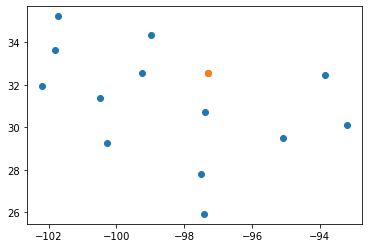

In [20]:
print(file_obj['x'][:].data.shape)
plt.scatter(file_obj['radar_longitude'][:].data, file_obj['radar_latitude'][:].data)
plt.scatter(file_obj['origin_longitude'][:].data, file_obj['origin_latitude'][:].data)
# plt.scatter(longs, lats)
# plt.xlim([-97.5, -96.5])
# plt.ylim([32.5,  33.5])

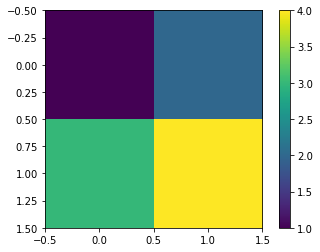

In [9]:
plt.imshow([[1,2],[3,4]])
plt.colorbar()

In [10]:
file_obj['reflectivity']

<class 'netCDF4._netCDF4.Variable'>
float32 reflectivity(time, z, y, x)
    _FillValue: -9999.0
    long_name: Reflectivity
    units: dBZ
    standard_name: equivalent_reflectivity_factor
    valid_max: 94.5
    valid_min: -32.0
    coordinates: elevation azimuth range
unlimited dimensions: time
current shape = (1, 11, 56, 54)
filling on

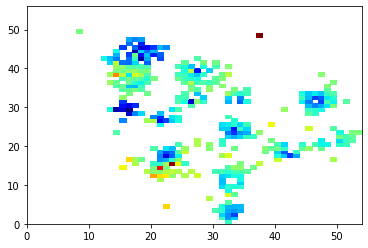

In [11]:
mat = file_obj['reflectivity'][0][0]
plt.pcolormesh(mat[:,:], cmap='jet')
# plt.xlim([-97.5, -96.5])
# plt.ylim([32.5,  33.5])

In [24]:
file_obj['reflectivity'][0][0].shape

(56, 54)

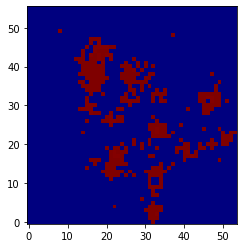

In [12]:
mat = file_obj['reflectivity'][0][0].data
plt.imshow(mat, cmap='jet', origin = 'lower')

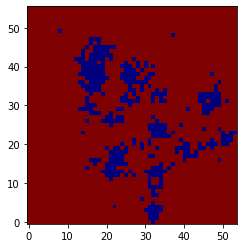

In [13]:
mat = file_obj['reflectivity'][0][0].mask
plt.imshow(mat, cmap='jet', origin = 'lower')

In [14]:
file_obj['time'].units

'seconds since 2020-02-01T02:00:06Z'

In [15]:
for var in file_obj.variables.keys():
    print(var, file_obj[var].shape)

time (1,)
x (54,)
y (56,)
z (11,)
origin_latitude (1,)
origin_longitude (1,)
origin_altitude (1,)
projection ()
ProjectionCoordinateSystem ()
radar_latitude (14,)
radar_longitude (14,)
radar_altitude (14,)
radar_time (14,)
radar_name (14, 4)
reflectivity (1, 11, 56, 54)
velocity (1, 11, 56, 54)
spectrum_width (1, 11, 56, 54)
differential_phase (1, 11, 56, 54)
differential_reflectivity (1, 11, 56, 54)
cross_correlation_ratio (1, 11, 56, 54)
ROI (1, 11, 56, 54)


In [16]:
file_obj['z'][:]

masked_array(data=[    0. ,  1000.1,  2000.2,  3000.3,  4000.4,  5000.5,
                    6000.6,  7000.7,  8000.8,  9000.9, 10001. ],
             mask=False,
       fill_value=1e+20)

In [23]:
for var in [ 'reflectivity',
 'velocity',
 'spectrum_width',
 'differential_phase',
 'differential_reflectivity',
 'cross_correlation_ratio',
 'ROI']:
    print(var)
    print(file_obj[var][0][0].fill_value)


reflectivity
-9999.0
velocity
-9999.0
spectrum_width
-9999.0
differential_phase
-9999.0
differential_reflectivity
-9999.0
cross_correlation_ratio
-9999.0
ROI
1e+20


In [22]:
file_obj['reflectivity'][0][0].fill_value

-9999.0